In [1]:
#Question3.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import numpy as np
california_housing = fetch_california_housing(as_frame=True)
DF = california_housing.frame
DF.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
#b. Choose the following features from the dataset as your X matrix: MedInc,HouseAge, AveRooms,
# AveBedrms, Population, AveOccup, Latitude, Longitude
X = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].values 

In [3]:
#c. Choose the following feature from the dataset as your Y matrix: MedHouseVal
Y = DF[['MedHouseVal']].values

In [4]:
#d. Apply 0 – 1 normalization on X and Y
from sklearn.preprocessing import MinMaxScaler
 
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [5]:
#e. Randomly split your data into training (70% of total) and test sets (30% of total)
#by using sklearn’s train_test_split function. Set random_state = 265:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=265)

In [6]:
#f. Set the number_of_steps = 1000 and learning_rate = 0.01
number_of_steps = 1000
learning_rate = 0.01

In [7]:
#a. Implement the gradient descent algorithm from scratch
#g. By running your code, determine the best set of parameters (=weights) for the constant
#and your features listed in b). Your cost function will be MSE (=you should
#pick the set of parameters that give you the lowest MSE).
weight_vector=np.random.randn(X.shape[1])
intercept=0
learning_rate = 0.01

In [8]:
#MSE loss function
def loss(Y,Y_predicted):
    n=len(Y)
    s=0
    for i in range(n):
        s+=(Y[i]-Y_predicted[i])**2
    return (1/n)*s

In [9]:
#wx+b
def predicted_Y(weight,X,intercept):
    Y_lst=[]
    for i in range(len(X)):
        Y_lst.append(weight@X[i]+intercept) 
    return np.array(Y_lst)

In [10]:
#derivative of loss w.r.t weight
def dldw(X,Y,Y_predicted):
    s=0
    n=len(Y)
    for i in range(n):
        s+=-X[i]*(Y[i]-Y_predicted[i])
    return (2/n)*s

In [11]:
# derivative of loss w.r.t bias
def dldb(Y,Y_predicted):
    n=len(Y)
    s=0
    for i in range(len(Y)):
        s+=-(Y[i]-Y_predicted[i])
    return (2/n) * s

In [12]:
def gradient_descent(X,Y):
    weight_vector=np.zeros(X.shape[1])
    intercept=0
    epoch = 1000 #1000 iters
    n = len(X)
    linear_loss=[]
    learning_rate = 0.01

    for i in range(epoch):
        
        
        Y_predicted = predicted_Y(weight_vector,X,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(X,Y,Y_predicted) #update weight
        
        
        intercept = intercept - learning_rate * dldb(Y,Y_predicted) #update bias
        linear_loss.append(loss(Y,Y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    

weight: [ 0.41305349  0.12337078  0.01837195  0.00315099  0.00937567 -0.00078145
 -0.02793103  0.0340772 ]
intercept: [0.22459396]


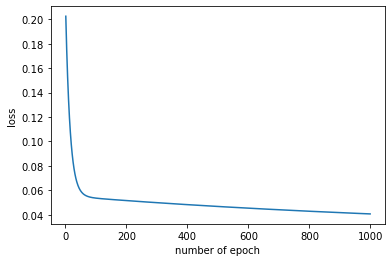

In [13]:
w,b=gradient_descent(X_train,Y_train)
print("weight:",w)
print("intercept:",b)

In [14]:
#h.the weights are [ 0.41305349  0.12337078  0.01837195  0.00315099  0.00937567 -0.00078145
# -0.02793103  0.0340772 ]
# and the intercept is 0.22459396
# Since we (0,1) normalized our data, the factor that explain the house price the most should be the one with the 
# maximum absolute value of weight, which is MedInc

In [15]:
#Question4.
#c
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, alpha = 0.01, random_state = 265)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
#d
clf.intercept_

array([0.27986693])

In [17]:
clf.coef_

array([ 0.74289115,  0.12123235,  0.02459013,  0.00144189,  0.00494056,
       -0.00390117, -0.17298551, -0.13952611])

In [18]:
#e.the weights are [ 0.74289115,  0.12123235,  0.02459013,  0.00144189,  0.00494056,
#       -0.00390117, -0.17298551, -0.13952611]
# and the intercept is 0.27986693
# Since we (0,1) normalized our data, the factor that explain the house price the most should be the one with the 
# maximum absolute value of weight, which is MedInc
# Comparing with BGD, we can see that there is little variation, not a lot. The intercept is very close, and all 
# the weights are 3~6 decimal places, and the two methods both show that population is the factor that influence 
# price the most. The difference might be result from the different method of gradient decent. BGD use all the samples
# from the training set, while SGD only randomly use a subset of it. SGD converges much faster, but the cost function 
# might not be as minimized as BGD.

In [19]:
#Question5.
def Mean(matrix):
    for i in range(matrix.shape[1]):
        mean_matrix=matrix.mean(axis=0) #calculate each column mean and append to the new matrix as column
        matrix[:,i]=mean_matrix[i]
    return matrix

In [22]:

A = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].values 
B = DF[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']].values 
mean=Mean(A)
pre_cov = np.dot((B - mean).T, (B - mean))
print(pre_cov)

[[ 7.44928083e+04 -5.87414892e+04  3.17132271e+04 -1.15284490e+03
   2.14665811e+05  7.64239253e+03 -6.68414144e+03 -1.19220569e+03]
 [-5.87414892e+04  3.26914042e+06 -9.85075210e+04 -9.57068430e+03
  -8.71434425e+07  3.55877856e+04  6.19883093e+03 -5.63082209e+04]
 [ 3.17132271e+04 -9.85075210e+04  1.26342314e+05  2.05124375e+04
  -4.17596549e+06 -2.57345350e+03  1.16039779e+04 -2.81760265e+03]
 [-1.15284490e+03 -9.57068430e+03  2.05124375e+04  4.63534397e+03
  -7.33246403e+05 -6.27926172e+02  1.45660332e+03  2.61505150e+02]
 [ 2.14665811e+05 -8.71434425e+07 -4.17596549e+06 -7.33246403e+05
   2.64689078e+10  1.69593140e+07 -5.43090134e+06  4.67221221e+06]
 [ 7.64239253e+03  3.55877856e+04 -2.57345350e+03 -6.27926172e+02
   1.69593140e+07  2.22632946e+06  1.08337499e+03  1.06329482e+03]
 [-6.68414144e+03  6.19883093e+03  1.16039779e+04  1.45660332e+03
  -5.43090134e+06  1.08337499e+03  9.41611579e+04 -8.16696318e+04]
 [-1.19220569e+03 -5.63082209e+04 -2.81760265e+03  2.61505150e+02
   

In [23]:
cov=pre_cov/(Y.shape[0])
cov

array([[ 3.60914769e+00, -2.84600238e+00,  1.53649356e+00,
        -5.58548886e-02,  1.04004753e+01,  3.70270956e-01,
        -3.23844062e-01, -5.77619034e-02],
       [-2.84600238e+00,  1.58388586e+02, -4.77265121e+00,
        -4.63695945e-01, -4.22206601e+03,  1.72421442e+00,
         3.00330956e-01, -2.72811148e+00],
       [ 1.53649356e+00, -4.77265121e+00,  6.12123614e+00,
         9.93819648e-01, -2.02323909e+02, -1.24682825e-01,
         5.62208233e-01, -1.36511756e-01],
       [-5.58548886e-02, -4.63695945e-01,  9.93819648e-01,
         2.24580619e-01, -3.55255040e+01, -3.04227797e-02,
         7.05718662e-02,  1.26698232e-02],
       [ 1.04004753e+01, -4.22206601e+03, -2.02323909e+02,
        -3.55255040e+01,  1.28240832e+06,  8.21672190e+02,
        -2.63125065e+02,  2.26366871e+02],
       [ 3.70270956e-01,  1.72421442e+00, -1.24682825e-01,
        -3.04227797e-02,  8.21672190e+02,  1.07864799e+02,
         5.24890984e-02,  5.15162217e-02],
       [-3.23844062e-01,  3.003309